<a href="https://colab.research.google.com/github/Mcelekwachi/Project-Exploring-NYC-Public-School/blob/main/Simple_SAT_scores_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#import necessary module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Optional: For logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



In [20]:


# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()



,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [21]:
# Calculate maths result greater or equal to 80% as best math results and
best_math_schools = schools[schools["average_math"] >= 640]

# Select the best math results with school name

best_math_schools = best_math_schools[["school_name", "average_math"]]
best_math_schools = best_math_schools.sort_values("average_math",                                                ascending=False)
best_math_schools.head()



,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683


In [22]:
# Top 10 performing schools based on the combined SAT scores?
# Add the necessary columns to arrive at the total sum
schools["total_SAT"] = schools["average_math"] + schools["average_reading"
                    ] + schools["average_writing"]
schools = schools.sort_values( "total_SAT", ascending=False)
# Select and store the required colums
top_10_schools = schools[["school_name", "total_SAT"]]
top_10_schools = top_10_schools.head(10)
top_10_schools.head()





,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981


In [23]:
borough = schools.groupby("borough")["total_SAT"].agg(["min",
                "max", "mean", "median", "count", "std"])

# Find borough with largest std
largest_std_dev_borough = borough.loc[borough["std"].idxmax()]



In [24]:
# Create DataFrame with the results
largest_std_dev = pd.DataFrame({
    "borough": largest_std_dev_borough.name,
    "num_schools": largest_std_dev_borough["count"],
    "average_SAT": largest_std_dev_borough["mean"],
    "std_SAT": largest_std_dev_borough["std"]
}, index=[0])


# Display the DataFrame
largest_std_dev = round(largest_std_dev, 2)
largest_std_dev.head()

,borough,num_schools,average_SAT,std_SAT
0,Manhattan,89.0,1340.13,230.29


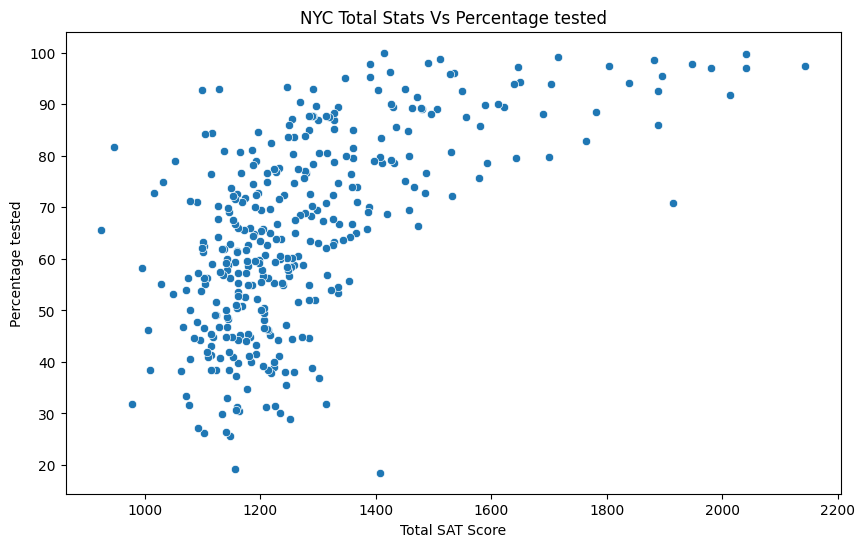

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="total_SAT", y = "percent_tested", data =schools)
plt.xlabel("Total SAT Score")
plt.ylabel("Percentage tested")
plt.title("NYC Total Stats Vs Percentage tested")
plt.show()

In [26]:
# Define features and labels
X = schools['total_SAT']
y = schools['percent_tested']
schools = pd.DataFrame({'total_SAT': X, 'percent_tested': y}).dropna()

#create regression model, train it and make predictions

X = schools['total_SAT'].values.reshape(-1, 1)  # Reshape to 2D array
y = schools['percent_tested'].values  # Target can remain 1D

#split data into training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create linear regression to train model and make predictions
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)


In [27]:
#create linear regression to train model and make predictions
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [28]:
#Evaluate model, prine coefficients, mean squared errors

print("Coefficients:", linear_model.coef_)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse)
#coefficiant of deteremination
r2 = r2_score(y_test, y_pred)
print("Coefficiant of deteremination: %.2f" % r2)

Coefficients: [0.05944063]
Mean squared error: 235.57
Coefficiant of deteremination: 0.30


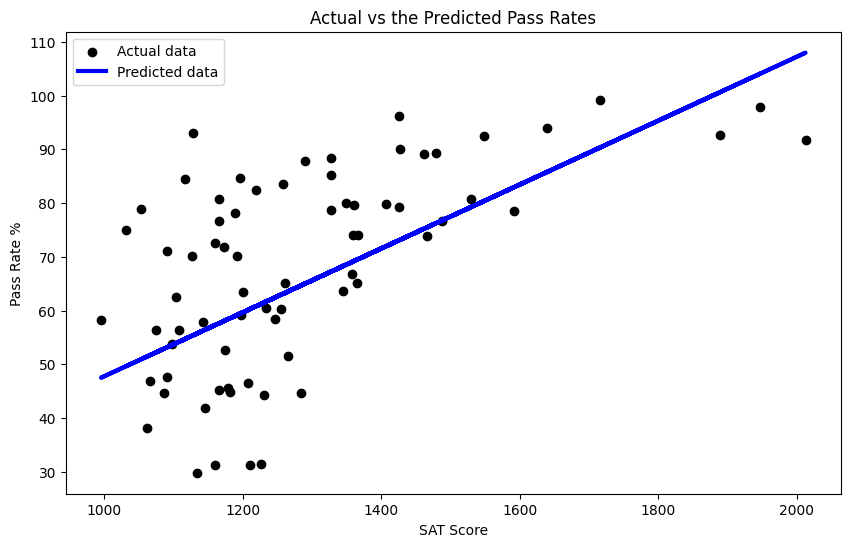

In [29]:
#plot the actual data vs the prediction
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="black", label="Actual data")
plt.plot(X_test, y_pred, color="blue", linewidth=3, label="Predicted data")
plt.xlabel("SAT Score")
plt.ylabel("Pass Rate %")
plt.title("Actual vs the Predicted Pass Rates")
plt.legend()
plt.show()